<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Distribuci%C3%B3n_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [32]:
n1,m1 = 15,15
n,m = n1+2,m1+2
matriz = np.zeros((n,m))
Matriz = np.zeros((n1,m1))

In [37]:

N = 10000 #No. iteraciones
lista_prom = []
# Bucle principal
for i in range(1,n-1):
  for j in range(1,m-1):
    suma = 0
    for k in range(N):
      f, l = i,j #Guardar el punto de partida o donde nos encontramos
      while True:
          contador = 0
          # Generar número aleatorio para decidir donde movernos
          n_aleatorio = rd.uniform(0, 1)
          #Movernos de la posicion de donde nos encontramos
          if n_aleatorio <= 0.25 and f > 0:   #avanzar a la izquierda
              f -= 1
          elif 0.25 < n_aleatorio <= 0.5 and l > 0:  #avanzar arriba
              l -= 1
          elif 0.5 < n_aleatorio <= 0.75 and f < m : #avanzar a la derecha
              f += 1
          elif 0.75 < n_aleatorio and l < n: #avanzar abajo
              l += 1

          # Actualizar contador según las condiciones en los bordes
          if l == 0:  # Izquierda
              contador += 100
              break
          elif l == n:  # Derecha
              contador += 60
              break
          elif f == 0:  # Arriba
              contador += 80
              break
          elif f == m :  # Abajo
              contador += 40
              break
      suma = suma + contador
      if i == 1 and j == 8:
        prom = suma/(k+1)
        lista_prom.append(prom)





    # Registrar posición en la matriz
    matriz[i][j] = suma/N


print(matriz)

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    89.846 85.44  83.442 82.082 80.9   80.404 79.842 79.48  78.942
  78.56  78.116 77.568 76.97  75.83  73.966  0.   ]
 [ 0.    93.134 88.722 85.858 83.504 82.054 80.78  79.628 78.834 77.958
  76.99  76.352 75.486 73.964 72.432 69.93   0.   ]
 [ 0.    95.    90.658 87.102 84.582 82.508 80.746 79.5   78.096 77.272
  75.846 74.626 73.458 72.09  70.134 67.528  0.   ]
 [ 0.    95.616 91.36  88.132 85.252 82.564 80.68  78.582 76.752 75.86
  74.332 73.362 71.522 69.808 68.082 65.846  0.   ]
 [ 0.    95.97  91.942 88.52  84.978 82.324 79.864 78.306 76.012 74.692
  73.096 71.472 69.972 68.464 66.698 64.87   0.   ]
 [ 0.    95.936 91.794 88.408 84.91  82.086 78.794 77.304 74.852 73.216
  71.782 69.808 68.626 66.88  65.328 63.84   0.   ]
 [ 0.    95.794 91.446 87.646 84.69  80.622 77.884 75.988 74.152 71.796
  69.81  68.614 67.058 65.804 64.166 62.856  0.   ]
 [ 0.    95.

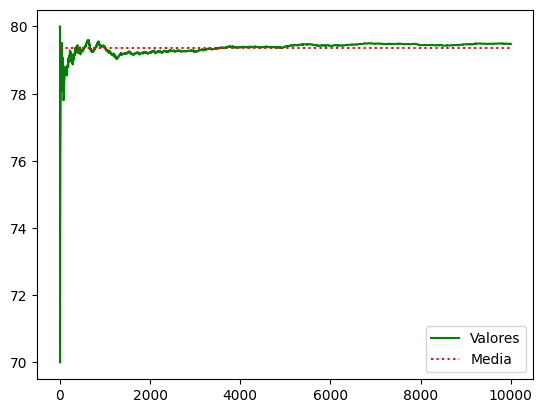

In [38]:
"""media = np.mean(lista_prom)

plt.plot(lista_prom,color = 'green')
plt.hlines(media,color = 'r', linestyles = 'dotted')
plt.show()"""

media = np.mean(lista_prom)
limite = np.std(lista_prom)
#print(media, limite)
# Graficar
plt.plot(lista_prom,color='green', label='Valores')
plt.hlines(media, xmin=0, xmax=len(lista_prom)-1, color='r', linestyle='dotted', label='Media')
#plt.hlines(media+limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite superior')
#plt.hlines(media-limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite inferior')
plt.legend()  # Agrega una leyenda opcional
plt.show()


In [51]:
Matriz = matriz[1:-1, 1:-1]
print(Matriz)

[[89.846 85.44  83.442 82.082 80.9   80.404 79.842 79.48  78.942 78.56
  78.116 77.568 76.97  75.83  73.966]
 [93.134 88.722 85.858 83.504 82.054 80.78  79.628 78.834 77.958 76.99
  76.352 75.486 73.964 72.432 69.93 ]
 [95.    90.658 87.102 84.582 82.508 80.746 79.5   78.096 77.272 75.846
  74.626 73.458 72.09  70.134 67.528]
 [95.616 91.36  88.132 85.252 82.564 80.68  78.582 76.752 75.86  74.332
  73.362 71.522 69.808 68.082 65.846]
 [95.97  91.942 88.52  84.978 82.324 79.864 78.306 76.012 74.692 73.096
  71.472 69.972 68.464 66.698 64.87 ]
 [95.936 91.794 88.408 84.91  82.086 78.794 77.304 74.852 73.216 71.782
  69.808 68.626 66.88  65.328 63.84 ]
 [95.794 91.446 87.646 84.69  80.622 77.884 75.988 74.152 71.796 69.81
  68.614 67.058 65.804 64.166 62.856]
 [95.442 91.018 86.476 83.606 79.84  76.322 74.2   72.022 69.848 67.918
  66.882 65.504 64.478 63.59  62.226]
 [95.104 90.364 85.916 81.844 78.01  75.178 72.338 69.816 67.966 66.446
  65.132 63.666 62.958 61.942 61.122]
 [94.426 89.1

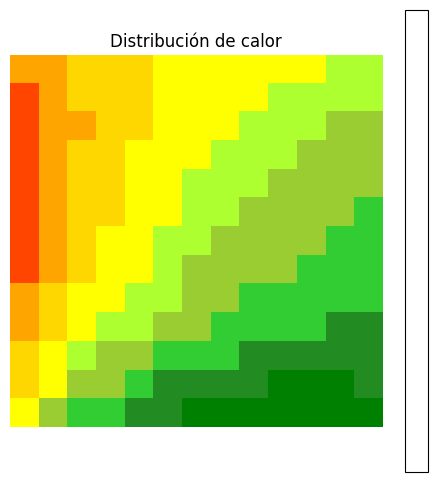

In [52]:

Matriz = Matriz[1:-1, 1:-1]

# Configuración del mapa de colores
cmap = mcolors.ListedColormap([
    'red', 'orangered', 'orange', 'gold', 'yellow', 'greenyellow',
    'yellowgreen','limegreen', 'forestgreen', 'green'])
bounds = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50]  # Límites definidos para las clases
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Visualización de la matriz con el mapa de calor
plt.figure(figsize=(6, 6))
plt.imshow(Matriz, cmap=cmap, norm=norm)
plt.colorbar(label="Temperatura", ticks=bounds)
plt.title("Distribución de calor")
plt.axis('off')
plt.show()
